### Plotting Time Series Data , Fourier Domain representation, ASD (Amplitude Spectral Density) and a Spectogram

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import readligo as rl
%matplotlib inline

In [6]:
fileName = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
strain, time, channel_dict = rl.loaddata(fileName)
ts = time[1] - time[0]
fs = int(1.0 / ts)

In [7]:
segList = rl.dq_channel_to_seglist(channel_dict['DEFAULT'], fs)
length = 16  # seconds
strain_seg = strain[segList[0]][0:(length*fs)]
time_seg = time[segList[0]][0:(length*fs)]

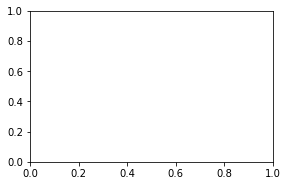

In [8]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.subplot(321)

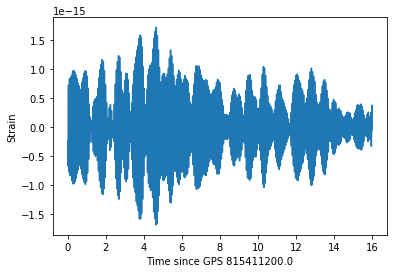

In [9]:
plt.plot(time_seg - time_seg[0], strain_seg)
plt.xlabel('Time since GPS ' + str(time_seg[0]))
plt.ylabel('Strain')

In [10]:
window = np.blackman(strain_seg.size)
windowed_strain = strain_seg*window
freq_domain = np.fft.rfft(windowed_strain) / fs
freq = np.fft.rfftfreq(len(windowed_strain))*fs

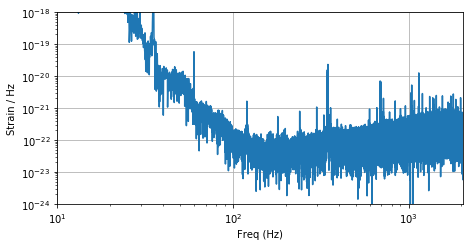

In [12]:
plt.figure(figsize=(16, 12))
plt.subplot(322)
plt.loglog( freq, abs(freq_domain))
plt.axis([10, fs/2.0, 1e-24, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')